In [1]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import os
from pyscikit import ImgKit
import tensorflow as tf
from absl import logging



In [2]:
def set_memory_growth():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                logical_gpus = tf.config.experimental.list_logical_devices(
                    'GPU')
                logging.info(
                    "Detect {} Physical GPUs, {} Logical GPUs.".format(
                        len(gpus), len(logical_gpus)))
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            logging.info(e)
    else:
        logging.info("No GPU found!")
# set_memory_growth()
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
set_memory_growth()
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# !pip install tiffile

In [4]:
input_dir = "data2/input/"
target_dir = "data2/target/"

img_size_w = 512
img_size_h = 512


input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".tif")
    ]
)

target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".tif") and fname.startswith("M_Align")
    ]
)
# remove not matched pairs 
input_img_paths2 = []
target_img_paths2 = []
for filepath in input_img_paths:
    if os.path.exists(filepath.replace("input/C","target/M_Align_")):
        input_img_paths2.append(filepath)
        target_img_paths2.append(filepath.replace("input/C","target/M_Align_"))




for input_path, target_path in zip(input_img_paths2[:10], target_img_paths2[:10]):
    print(input_path, "|", target_path)


print("Number of input_img_paths samples:", len(input_img_paths))
print("Number of target_img_paths samples:", len(target_img_paths))

print("Number of input_img_paths samples:", len(input_img_paths2))
print("Number of target_img_paths samples:", len(target_img_paths2))
# print(input_img_paths2[-10:])
# print(target_img_paths2[-10:])
input_img_paths = input_img_paths2
target_img_paths = target_img_paths2

data2/input/C00001_48mp_0x8_0x007f.tif | data2/target/M_Align_00001_48mp_0x8_0x007f.tif
data2/input/C00001_48mp_0x8_0x00ff.tif | data2/target/M_Align_00001_48mp_0x8_0x00ff.tif
data2/input/C00001_48mp_0x8_0x01ff.tif | data2/target/M_Align_00001_48mp_0x8_0x01ff.tif
data2/input/C00001_48mp_0x8_0x03ff.tif | data2/target/M_Align_00001_48mp_0x8_0x03ff.tif
data2/input/C00001_48mp_0x8_0x07ff.tif | data2/target/M_Align_00001_48mp_0x8_0x07ff.tif
data2/input/C00001_48mp_0x8_0x0fff.tif | data2/target/M_Align_00001_48mp_0x8_0x0fff.tif
data2/input/C00001_48mp_0x8_0x1fff.tif | data2/target/M_Align_00001_48mp_0x8_0x1fff.tif
data2/input/C00001_48mp_0x8_0x2fff.tif | data2/target/M_Align_00001_48mp_0x8_0x2fff.tif
data2/input/C00002_48mp_0x8_0x007f.tif | data2/target/M_Align_00002_48mp_0x8_0x007f.tif
data2/input/C00002_48mp_0x8_0x00ff.tif | data2/target/M_Align_00002_48mp_0x8_0x00ff.tif
Number of input_img_paths samples: 518
Number of target_img_paths samples: 407
Number of input_img_paths samples: 406
Nu

In [5]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #7
# display(Image(filename=input_img_paths[9]))
# rgb_im = PIL.Image.open(input_img_paths[7])
# IMG = Image.fromarray(rgb_im)
# rgb_im
# # Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))


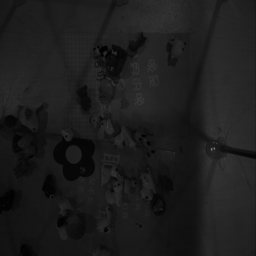

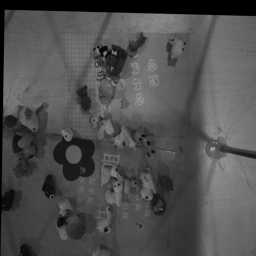

In [6]:
tt = 5
rgb_im = PIL.Image.open(input_img_paths[tt]).resize((256,256))
# IMG = Image.fromarray(rgb_im)
display(rgb_im)
rgb_im = PIL.Image.open(target_img_paths[tt]).resize((256,256))
# IMG = Image.fromarray(rgb_im)
display(rgb_im)

In [7]:
# def pack_raw(raw):
#     # pack Bayer image to 4 channels
#     im = raw.raw_image_visible.astype(np.float32)
#     im = np.maximum(im - 512, 0) / (16383 - 512)  # subtract the black level

#     im = np.expand_dims(im, axis=2)
#     img_shape = im.shape
#     H = img_shape[0]
#     W = img_shape[1]

#     out = np.concatenate((im[0:H:2, 0:W:2, :],
#                           im[0:H:2, 1:W:2, :],
#                           im[1:H:2, 1:W:2, :],
#                           im[1:H:2, 0:W:2, :]), axis=2)
#     return out
def pack_raw(im):
    # pack Bayer image to 4 channels
#     im = raw.raw_image_visible.astype(np.float32)
#     im = np.maximum(im - 512, 0) / (16383 - 512)  # subtract the black level

#     im = np.expand_dims(im, axis=2)
    img_shape = im.shape
    H = img_shape[0]
    W = img_shape[1]

    out = np.concatenate((im[0:H:2, 0:W:2, :],
                          im[0:H:2, 1:W:2, :],
                          im[1:H:2, 1:W:2, :],
                          im[1:H:2, 0:W:2, :]), axis=2)
    return out

In [8]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import random
# import tiffile as tiff
import PIL.Image as Image
from skimage import io

class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        xi,yi,wi,hi = random.randint(50,400),random.randint(50,400),img_size_w,img_size_h
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
#         print(batch_input_img_paths,batch_target_img_paths)
#         x = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="float32")
        x = np.zeros((self.batch_size,) + (256,256) + (4,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = io.imread(path)
            img = img[xi:xi+wi,yi:yi+hi]
#             img = (img / 127.5) - 1
#             x[j] = img
            x[j] = pack_raw(img)
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="float32")
        for j, path in enumerate(batch_target_img_paths):
            img = io.imread(path)
            img = img[xi:xi+wi,yi:yi+hi]
#             img = (img / 127.5) - 1
            y[j] = np.expand_dims(img, 2)

        return x, y


In [9]:
# def get_model(img_size, num_classes):
#     img_size=(256,256,4)
#     inputs = keras.Input(shape=img_size)

#     ### [First half of the network: downsampling inputs] ###

#     # Entry block
#     x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     previous_block_activation = x  # Set aside residual

#     # Blocks 1, 2, 3 are identical apart from the feature depth.
#     for filters in [64, 128, 256]:
#         x = layers.Activation("relu")(x)
#         x = layers.SeparableConv2D(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.Activation("relu")(x)
#         x = layers.SeparableConv2D(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

#         # Project residual
#         residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
#             previous_block_activation
#         )
#         x = layers.add([x, residual])  # Add back residual
#         previous_block_activation = x  # Set aside next residual

#     ### [Second half of the network: upsampling inputs] ###

#     for filters in [256, 128, 64, 32]:
#         x = layers.Activation("relu")(x)
#         x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.Activation("relu")(x)
#         x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.UpSampling2D(2)(x)

#         # Project residual
#         residual = layers.UpSampling2D(2)(previous_block_activation)
#         residual = layers.Conv2D(filters, 1, padding="same")(residual)
#         x = layers.add([x, residual])  # Add back residual
#         previous_block_activation = x  # Set aside next residual

#     # Add a per-pixel classification layer
#     outputs = layers.Conv2D(num_classes, 3, padding="same")(x)
# #     outputs = tensorflow.nn.depth_to_space(x, 2)
# #     outputs = layers.MaxPooling2D(3, strides=1, padding="same")(x)

#     # Define the model
#     model = keras.Model(inputs, outputs)
#     return model


# # Free up RAM in case the model definition cells were run multiple times
# keras.backend.clear_session()

# img_size = (512, 512)
# # img_size = (160, 160)
# num_classes = 1
# batch_size = 16

# # Build model
# model = get_model(img_size, num_classes)
# model.summary()

In [10]:
import random


img_size = (img_size_w, img_size_h)
# img_size = (160, 160)
num_classes = 1
batch_size = 16


# Split our img paths into a training and a validation set
val_samples = 50
random.Random(1).shuffle(input_img_paths)
random.Random(1).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

(256, 256, 4)
(512, 512, 1)
(16, 256, 256, 4)
(16, 512, 512, 1)
input:


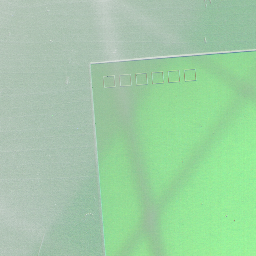

GT:


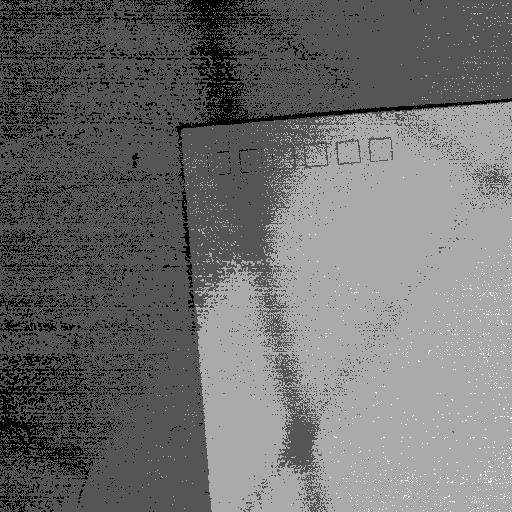

In [11]:
it = iter(train_gen)
x,y = next(it)
# display(Image.fromarray(x[0]))
print(x[0].shape)
print(y[0].shape)
# print(x[0][0])
print(x.shape)
print(y.shape)
# print(x[0][0])
i=0
print("input:")
img = keras.preprocessing.image.array_to_img(x[i])#PIL.ImageOps.autocontrast()
display(img)
print("GT:")
img = keras.preprocessing.image.array_to_img(y[i])#PIL.ImageOps.autocontrast()
display(img)

In [12]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dropout, BatchNormalization, LeakyReLU, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Conv2DTranspose

def get_unet(rows, cols):
    inputs = Input((rows, cols, 4))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

#     up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv9), tf.image.resize(conv1,size=[512,512])], axis=3)
#     conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
#     conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    
    conv10 = Conv2D(4, (1, 1), activation='linear')(conv9)
    
    out = tf.nn.depth_to_space(conv10, 2)

    model = Model(inputs=[inputs], outputs=[out])

    return model


In [13]:
# display(Image.fromarray(x[0]))
# x[0].shape
# print(x[0][0])

In [14]:
# display(Image.fromarray(y[0]))
# # Build model
model = get_unet(256, 256)
model.summary()

# # display(Image.fromarray(y[0]))


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1184        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 32) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [15]:
from tensorflow.keras import backend as K
from tensorflow.keras import losses

tf.config.experimental_run_functions_eagerly(True)
@tf.function
def perceptual_loss(y_true,y_pred):
#     print("Note:Need to remove vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5 to C:\\Users\\user_name\\.keras\\models\\")
    vgg_inp=tf.keras.Input([512,512,3])
    vgg= tf.keras.applications.VGG19(include_top=False,input_tensor=vgg_inp)
    for l in vgg.layers: l.trainable=False
    vgg_out_layer = vgg.get_layer(index=5).output
    vgg_content = tf.keras.Model(vgg_inp,vgg_out_layer)
    
    y_true = tf.tile(y_true,[1,1,1,3])
    y_pred = tf.tile(y_pred,[1,1,1,3])
#     print("***************",y_true)

    y_t=vgg_content(y_true)
    y_p=vgg_content(y_pred)
    loss=tf.keras.losses.mean_squared_error(y_t,y_p)
    return tf.reduce_mean(loss)
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)
def PSNRLoss(y_true, y_pred):
    return -10. * K.log(K.mean(K.square(y_pred - y_true))/255**2) / K.log(10.)
# def PSNRLoss(y_true, y_pred):
#     return 10. * K.log(255**2/mean_squared_error(y_pred , y_true))/ K.log(10.)

def customized_loss(y_true, y_pred, lamada=0.01):
    return losses.mean_absolute_error(y_pred , y_true) +  lamada * perceptual_loss(y_pred , y_true)

# img = Input(shape=(512, 512, 3))
# vgg = tf.keras.applications.VGG19(weights="imagenet",include_top=False,input_tensor=img)
# vgg.outputs = [vgg.layers[9].output]
# img_features = vgg(img)
# model_vgg = Model(img, img_features)
# model_vgg.trainable = False
# for l in model_vgg.layers:
#     l.trainable = False

# def perceptual_loss2(y_true,y_pred):
#     print("Note:Need to remove vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5 to C:\\Users\\user_name\\.keras\\models\\")
#     y_t=model_vgg(y_true)
#     y_p=model_vgg(y_pred)
#     loss=tf.keras.losses.mean_squared_error(y_t,y_p)
#     return tf.reduce_mean(loss)

# x_vgg = model_vgg(model.outputs)
# full_model = Model(model.inputs, x_vgg);   #针对x
# y_vgg = model_vgg.predict(y_train)  #针对y
# y_vgg_vali = model_vgg.predict(y_validate)  #针对y

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import losses
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
# model.compile(optimizer="adam", loss=[losses.mean_absolute_error,perceptual_loss], 
#               metrics=['mean_absolute_error',PSNRLoss,perceptual_loss],loss_weights=[1.0,3.0])#'mean_absolute_error',
model.compile(optimizer="adam", loss=customized_loss, 
              metrics=['mean_absolute_error',PSNRLoss])#'mean_absolute_error',
# model.compile(optimizer="adam", loss=[losses.mean_absolute_error], 
#               metrics=['mean_absolute_error',PSNRLoss,perceptual_loss])#
# 监控val_loss，当连续40轮变化小于0.0001时启动early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)

callbacks = [
    keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True),
    es
]

# Train the model, doing validation at the end of each epoch.
epochs = 300
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

/home/tcl/xingbo/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/300
22/22 [==============================] - 25s 905ms/step - loss: 96.8789 - mean_absolute_error: 26.6235 - PSNRLoss: 16.7974 - val_loss: 74.9124 - val_mean_absolute_error: 20.7033 - val_PSNRLoss: 17.9239
Epoch 2/300
22/22 [==============================] - 20s 896ms/step - loss: 65.4242 - mean_absolute_error: 18.0386 - PSNRLoss: 19.5588 - val_loss: 75.1902 - val_mean_absolute_error: 22.7592 - val_PSNRLoss: 17.1668
Epoch 3/300
22/22 [==============================] - 20s 892ms/step - loss: 63.4925 - mean_absolute_error: 18.1961 - PSNRLoss: 19.3966 - val_loss: 67.5899 - val_mean_absolute_error: 21.0710 - val_PSNRLoss: 17.7859
Epoch 4/300
22/22 [==============================] - 20s 893ms/step - loss: 58.1337 - mean_absolute_error: 17.7504 - PSNRLoss: 19.6435 - val_loss: 60.7444 - val_mean_absolute_error: 19.1264 - val_PSNRLoss: 18.4791
Epoch 5/300
22/22 [==============================] - 20s 898ms/step - loss: 57.4278 - mean_absolute_error: 17.6072 - PSNRLoss: 19.4997 - val_los

22/22 [==============================] - 20s 918ms/step - loss: 31.4279 - mean_absolute_error: 8.7557 - PSNRLoss: 24.6482 - val_loss: 38.6149 - val_mean_absolute_error: 11.3053 - val_PSNRLoss: 22.5753
Epoch 40/300
16/22 [====================>.........] - ETA: 5s - loss: 35.7245 - mean_absolute_error: 10.3740 - PSNRLoss: 22.7955

In [ ]:
import IPython
def displayImages(imgs,rows,cols,png = 'output.png',img_size=(128,128), display_width = 1024):
    if imgs is None or len(imgs) == 0:
        print('no imgs')
        return
    if rows * cols < len(imgs):
        print('rows,cols incorrect')
    w = imgs[0].size[0] #dim of img
    h = imgs[0].size[1]
    channel = 1#imgs[0].size[2]
    canvas_w = w * cols
    canvas_h = h * rows
    canvas = PIL.Image.new('RGB', (canvas_w, canvas_h ), 'white')
    col = row = 0
    for i in range(len(imgs)):
        row,col = np.unravel_index(i, (rows,cols))
        tmp = imgs[i]
        canvas.paste(tmp, (col * w, row * h))
    canvas.save(png)
    IPython.display.display(IPython.display.Image(png, width=display_width))
    return canvas

In [ ]:
# Generate predictions for all images in the validation set

val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

it = iter(val_gen)
x,y = next(it)
print(x.shape)
print(y.shape)
val_preds = model.predict(x)
# val_preds = (val_preds +1)*127.5
print(val_preds.shape)

img_disp=[]
for i in range(batch_size):
#     print("input:")
    img_input = keras.preprocessing.image.array_to_img(x[i])#PIL.ImageOps.autocontrast()
    # display(img_input)
#     print("GT:")
    img_GT = keras.preprocessing.image.array_to_img(y[i])#PIL.ImageOps.autocontrast()
    # display(img_GT)
#     print("Predict:")
    img_predict = keras.preprocessing.image.array_to_img(val_preds[i])#PIL.ImageOps.autocontrast()
    # display(img_predict)
    img_disp.append(img_input.resize((512,512)))
    img_disp.append(img_GT)
    img_disp.append(img_predict)



canvas = displayImages(img_disp,batch_size,3,img_size=(512,512))#,png = 'output_unet_mae.png'


# # Generate predictions for all images in the validation set

# val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)
# val_preds = model.predict(val_gen)
# # val_preds = (val_preds + 2) * 256
# # print(val_preds)
# def display_mask(i):
#     """Quick utility to display a model's prediction."""
# #     mask = np.argmax(val_preds[i], axis=-1)
# # #     print(mask)
# #     mask = np.expand_dims(mask, axis=-1)
#     img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(val_preds[i]))#PIL.ImageOps.autocontrast()
#     print("******",img.size)
#     display(img)


# # Display results for validation image #10
# i = 1

# # Display input image
# # display(PIL.Image(filename=val_input_img_paths[i]))
# # PIL.Image(filename=val_input_img_paths[i])
# rgb_im = PIL.Image.open(val_input_img_paths[i])
# print(val_input_img_paths[i])
# # display(rgb_im)
# # Display ground-truth target mask
# img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i]))
# display(img)

# # Display mask predicted by our model
# display_mask(i)  # Note that the model only sees inputs at 150x150.

In [ ]:
# def upsample_and_concat(x1, x2, output_channels, in_channels):
#     pool_size = 2
#     deconv_filter = tf.Variable(tf.truncated_normal([pool_size, pool_size, output_channels, in_channels], stddev=0.02))
#     deconv = tf.nn.conv2d_transpose(x1, deconv_filter, tf.shape(x2), strides=[1, pool_size, pool_size, 1])

#     deconv_output = tf.concat([deconv, x2], 3)
#     deconv_output.set_shape([None, None, None, output_channels * 2])

#     return deconv_output


In [ ]:
# def network(rows, cols):
    
#     inputs = Input((rows, cols, 4))
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

#     conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
#     conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

#     up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
#     conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
#     conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

#     up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
#     conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
#     conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

#     up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
#     conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
#     conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

#     up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
#     conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
#     conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

#     conv10 = Conv2D(12, (1, 1), activation='linear')(conv9)

#     model = Model(inputs=[inputs], outputs=[conv10])

#     return model


In [ ]:
# mymodel = network(256,256)
# mymodel.summary()